10.01.2021

### Image Processing in Physics
#### Julia Herzen, Klaus Achterhold, Clemens Schmid, Manuel Schultheiss

# Exercise 1: Fraunhofer propagation

Generate a "speckle pattern" from an atmospheric phase screen using Fraunhofer propagation.

We would like to model the setup shown below:

![title](geometry_fraunhofer.png)

Atmospheric disturbances introduce random phase variations to (initially undisturbed) wavefronts.
These are then detected in an optical instrument consisting of an aperture and a converging lens.
We would like to simulate the resultant image in the focal plane of the lens.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["image.interpolation"] = "none"

Define relevant parameters:

In [2]:
N = 1024      # Square dimension of phase screen
radius = 128  # Radius of the circular aperture in pixels

Generate an NxN array of zeros for the aperture:

In [3]:
aperture = np.zeros((N,N))
sh = aperture.shape

Fill `aperture` with the transmission function of a circular aperture of radius `radius`:

Transmission should be `1` within the aperture, and `0` outside.

Functions of interest include: `np.meshgrid`, `np.linspace`, `np.arange` ...

Hint: In cartesian coordinates $(x,y)$, a circle of radius $r$
centered around the origin $(x_0, y_0)$ is given by: $(x-x_0)^2 + (y-y_0)^2 = r^2$.

<IPython.core.display.Javascript object>


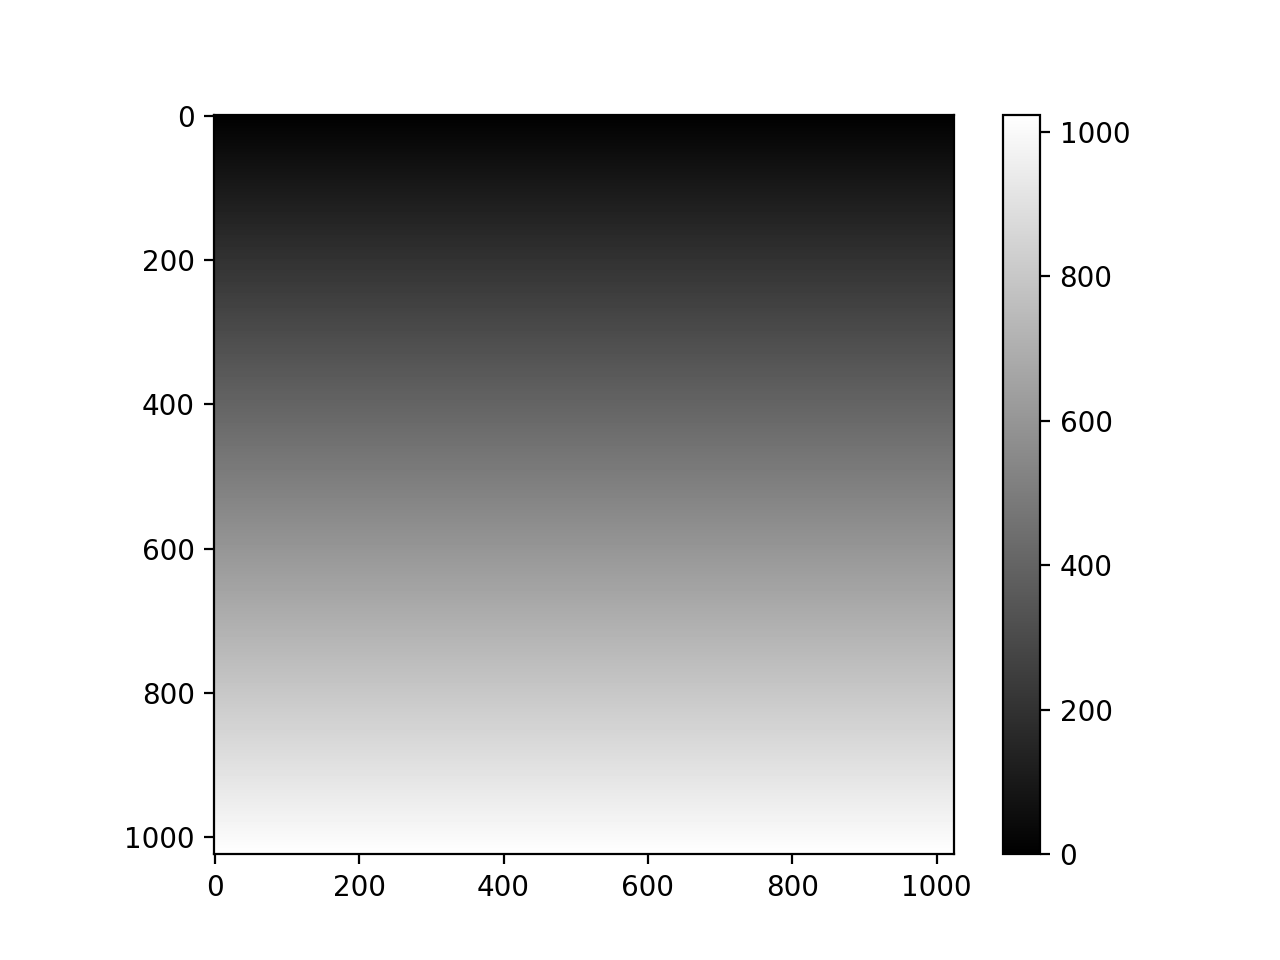

In [4]:
x = np.arange(sh[0]) #array from 0 to n-1
y = np.arange(sh[1])
yy,xx = np.meshgrid(x,y) # matrix of coordinates

#aperture = ???
plt.figure()
plt.imshow(xx)
plt.colorbar()
cx, cy = (sh[0] - 1) / 2., (sh[1] - 1) / 2. #x and y coordinates of the center
r = np.sqrt((xx - cx)**2 + (yy - cy)**2) #see definition above
aperture = (r < radius)#RETURNS boolean values


Plot your aperture function:

<IPython.core.display.Javascript object>


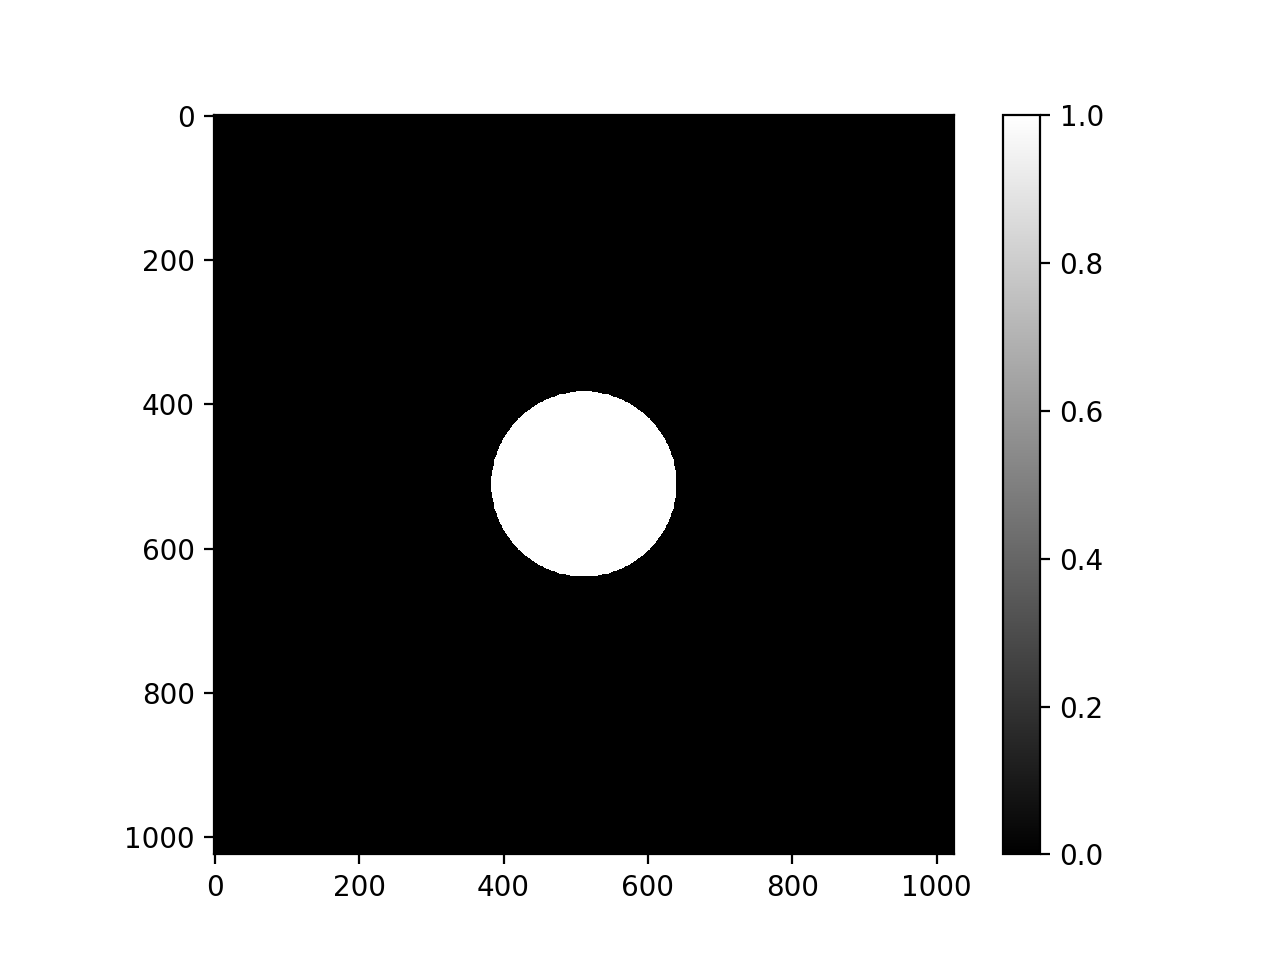

In [5]:
plt.figure()
plt.imshow(aperture)
plt.colorbar()

Load in the wavefront phase screen and plot it:

<IPython.core.display.Javascript object>


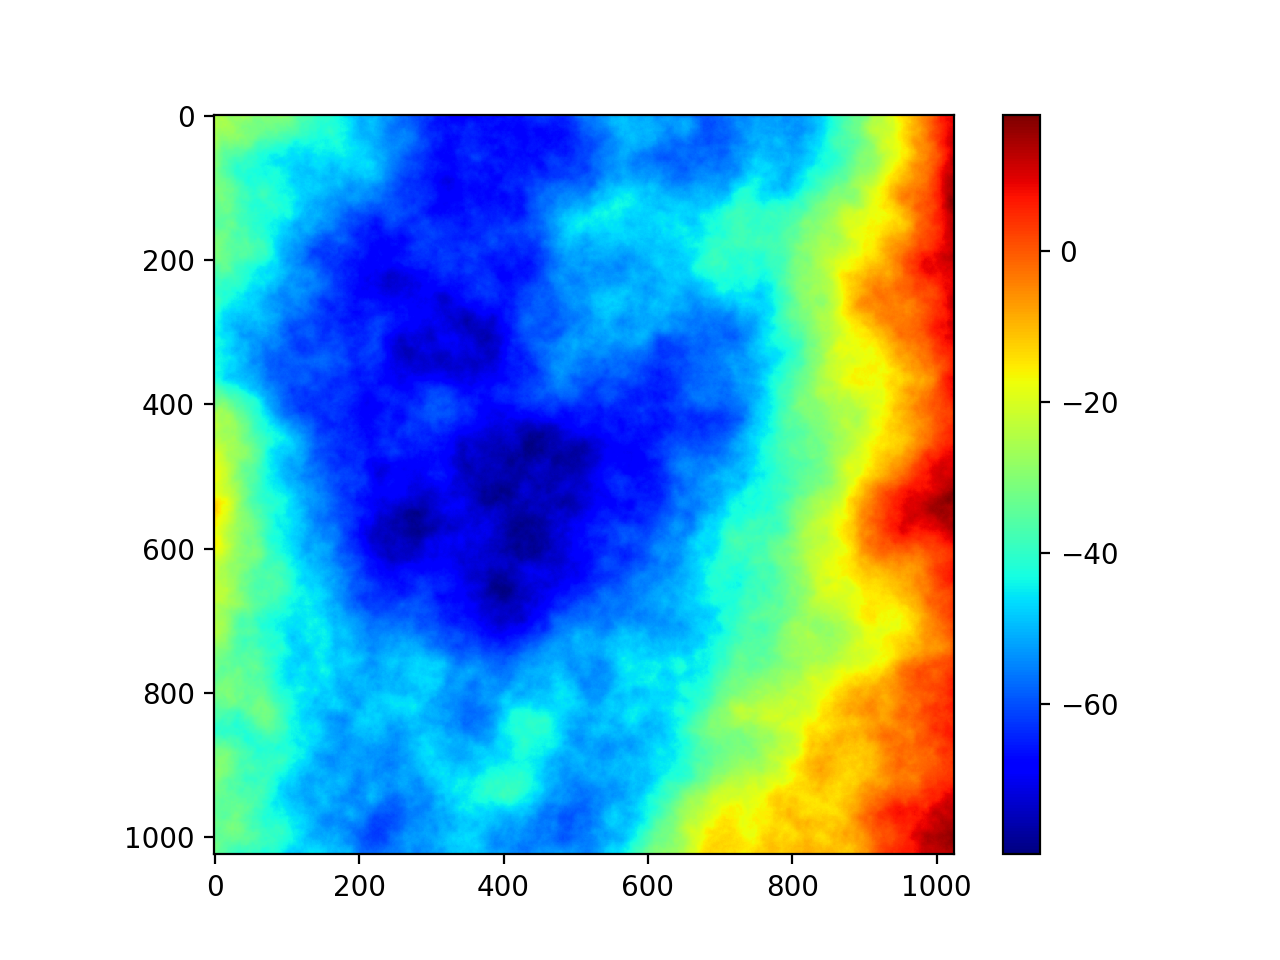

In [6]:
screen = np.loadtxt('wavefront.txt')

plt.figure()
plt.imshow(screen, cmap='jet')
plt.colorbar()

Propagate the phase screen from the aperture to the focal plane using Fraunhofer propagation. First, create the complex field from the combination of aperture and wavefront. Then, perform far-field propagation.

Hints:

* `aperture` is the magnitude, and `screen` is the phase.
* Fraunhofer propagation: Wave at focal plane is FT of wave at aperture plane
* You may need to use an `np.fft.fftshift` here!
* Intensity is the absolute value of field at the focal plane squared

In [11]:
field = aperture*np.exp(1.j*screen)#last term is phase function already applied to image
field_prop = np.fft.fftshift(np.fft.fft2(field))
intensity = (np.abs(field_prop))**2
intensity2 = np.abs(field_prop)**2

Show the far-field propagation image.
Near the center of the image, speckle patterns should be visible.

Crop the center of the image to see more details!

<IPython.core.display.Javascript object>


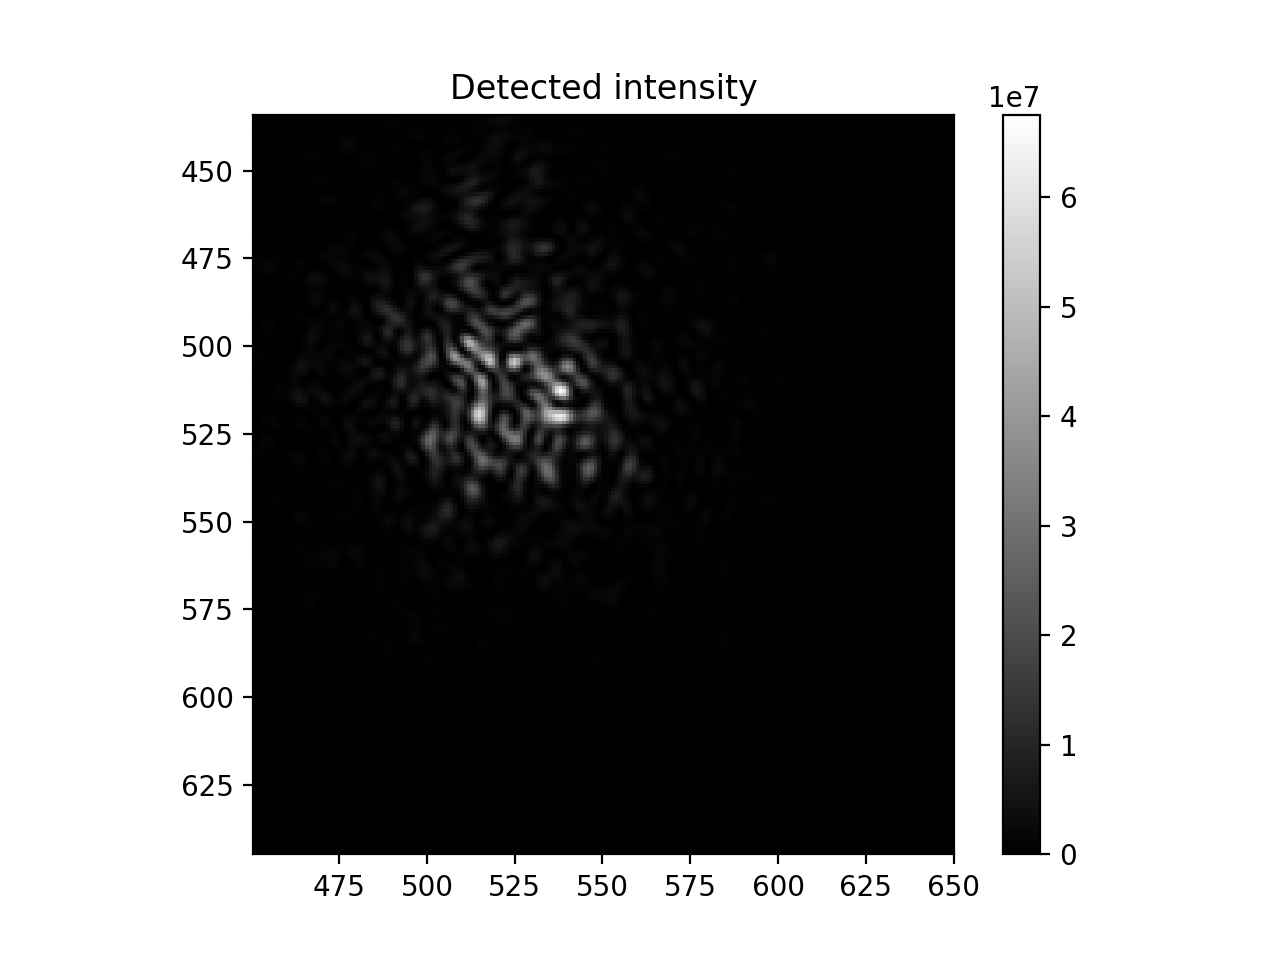

In [10]:
plt.figure()
plt.title('Detected intensity')
plt.imshow(intensity)
plt.colorbar()

<IPython.core.display.Javascript object>


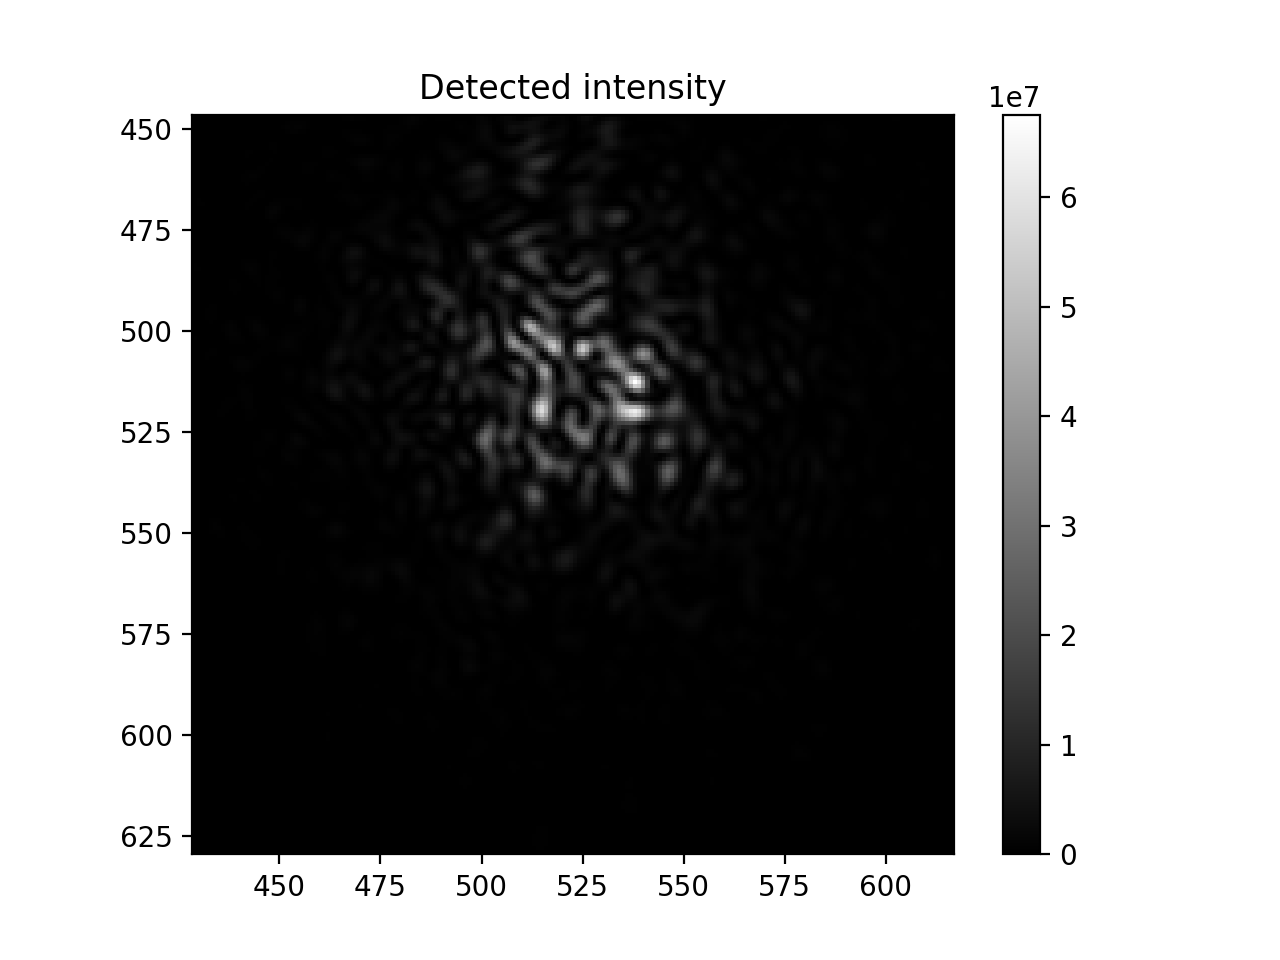

In [12]:
plt.figure()
plt.title('Detected intensity')
plt.imshow(intensity2)
plt.colorbar()

Fourier T of a circular pinhole = 2D sinc function, however the random phase shift alters the resulting intensity. The observed specle is the Fourier transform of the blue area of the screen

## Part 2: Tilted Wavefront

We perform Fraunhofer propagation on a wave which is travelling not directly to the detector, but is angled a bit to the bottom $\Rightarrow$ the wave vector is pointed towards the lower half of the detector. 

The magnitude of the wave field is $1$ everywhere. The phase encodes the direction of the wave. The wave vector is tilted, and orthogonal to the wavefront. We encode that tilt by a **vertical linear ramp in the phase**.

**Intuitively**, what intensity pattern do you expect? First, think of the pattern of the aperture alone (round aperture in lecture). It is then shifted according to the direction of the wave vector. How is this connected to the linear ramp and the Fourier transformation of Fraunhofer propagation?

Hint: You can look at some [Fourier transform relationships](https://en.wikipedia.org/wiki/Fourier_transform#Functional_relationships,_one-dimensional) and look for a "shift" ;-)

Define the tilted wavefront. Use the aperture for magnitude and phase for direction. Use a vertical ramp from $[0, N]$ in the phase.

In [15]:
ramp = np.linspace(0,1,N)[:,None]*N #one dimensional horizontal array, linear ramp in Y
field = aperture * np.exp(1.j*ramp)# tilted wavefront
field_prop = np.fft.fftshift(np.fft.fft2(field))
intensity = np.abs(field_prop)**2
ramp.shape

(1024, 1)

The phase of the aperture wave consists of a linear ramp. This means, that the original example has a uniform phase everywhere, but in this case now we have a ramp in the y-coordinate. Visualize the propagated wave. Zoom in to see the characteristic pattern of the aperture!

<IPython.core.display.Javascript object>


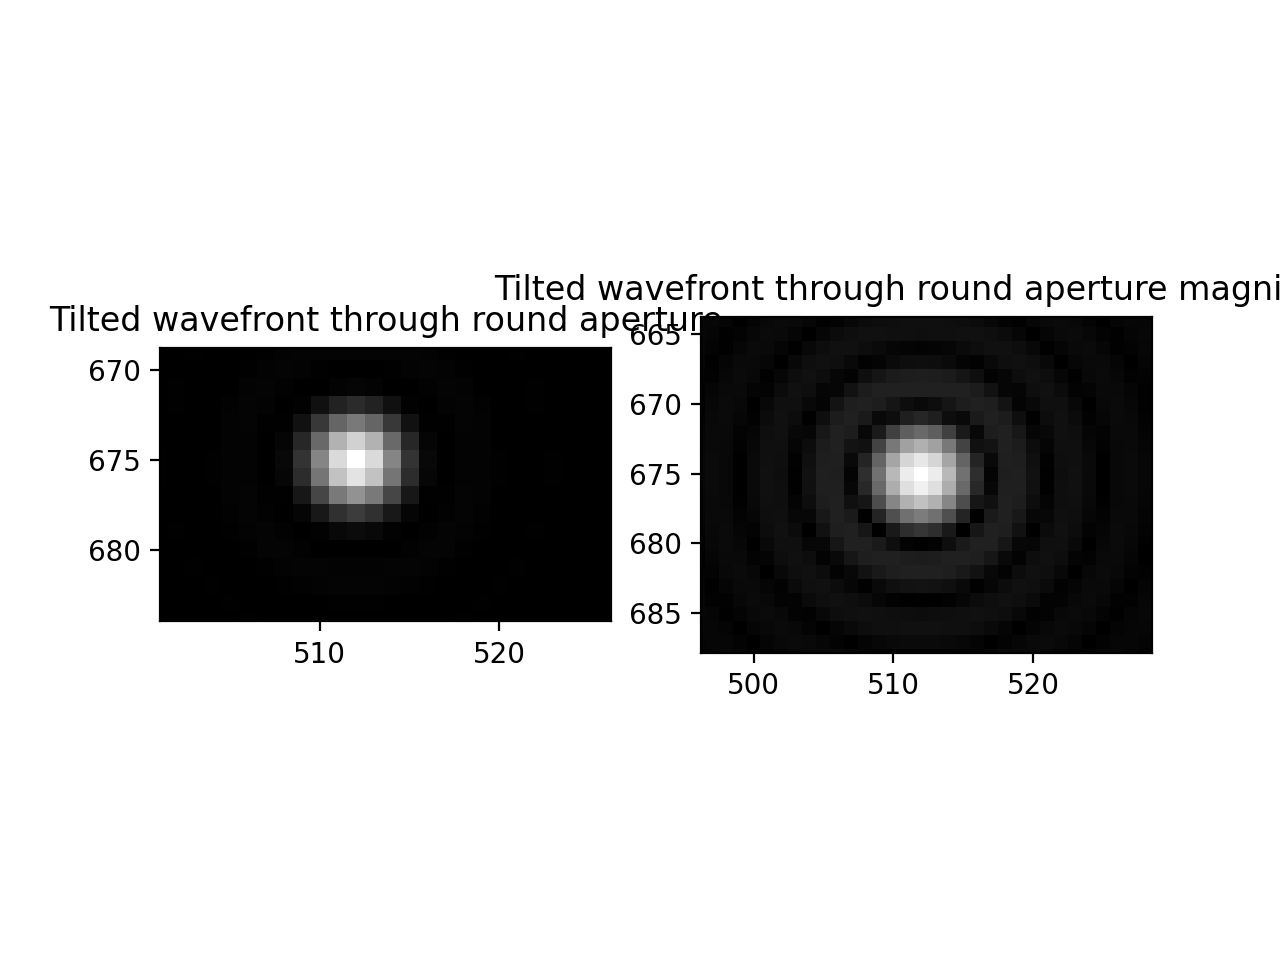

In [14]:
plt.figure()
plt.subplot(121)
plt.title("Tilted wavefront through round aperture")
plt.imshow(intensity)
plt.subplot(122)
plt.title("Tilted wavefront through round aperture magnitude")#
plt.imshow(np.sqrt(intensity))

Bright spot shifted downwards from the middle, due to the tilt of the wavefront. The maximum is shifted downwards on the detector.

Looking at the magnitude, the inference pattern is an array disk, which is expected from the round aperture.

Mathematically, the phase is a linear ramp. In real domain, shift in frquenciy domain, is represented by a multiplication of a function with an exponential term. In our case, 'a' is the slope. 

    Shift in frequency domain (the detector on our case) caused by a multiplication of the original function with the exponential (i*a*x). a*x is a ramp, whereas e^i is the phase of the wave. 